In [ ]:
"""
Purpose: To check the errors on the validation test set
to get ideas on how to make validation score go up

"""

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from os import sys
sys.path.append("/meshAfterParty/")
sys.path.append("/meshAfterParty/meshAfterParty/")

In [3]:
from pathlib import Path
import numpy as np
import neuron_visualizations as nviz
import datajoint as dj

import proofreading_utils as pru
import classification_utils as clu

import neuron_utils as nru
import validation_utils as vu
import pandas as pd
import datajoint_utils as du

INFO - 2021-03-31 18:07:32,744 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-03-31 18:07:32,745 - settings - Setting database.user to celiib
INFO - 2021-03-31 18:07:32,746 - settings - Setting database.password to newceliipass
INFO - 2021-03-31 18:07:32,750 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-03-31 18:07:32,751 - settings - Setting enable_python_native_blobs to True
INFO - 2021-03-31 18:07:32,760 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-03-31 18:07:33,106 - settings - Setting enable_python_native_blobs to True
INFO - 2021-03-31 18:07:33,110 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-03-31 18:07:33,112 - settings - Setting database.user to celiib
INFO - 2021-03-31 18:07:33,112 - settings - Setting database.password to newceliipass
INFO - 2021-03-31 18:07:33,113 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-03-31 18:07:33,114 - settings - Setting database.user to celiib
INFO - 2021-03-31 18:07:33,115 - settings - Setting database.password to newceliipass
INFO - 2021-03-31 18:07:33,117 - settings - Setting enable_python_native_blobs to True
INFO - 2021-03-31 18:07:33,538 - settings - Setting enable_python_native_blobs to True


# Computing the validation statistics (to pick the ones to look at)

In [5]:
segment_ids = du.proofreading_stats_table(validation=True).fetch("segment_id")

validation_dfs = [vu.synapse_validation_df_single_neuron(k,
                                        remove_presyn_on_dendrite = False,
                        count_presyn_on_dendrite_as_correct = True,
                                                        include_extension_synapse=False) for k in segment_ids]

Synapsse Results:
Total Number of Synapses = 3990
n_valid_syn_ids_presyn = 5
n_errored_syn_ids_presyn = 29
n_valid_syn_ids_postsyn = 3891
n_errored_syn_ids_postsyn = 65
Synapsse Results:
Total Number of Synapses = 4434
n_valid_syn_ids_presyn = 39
n_errored_syn_ids_presyn = 482
n_valid_syn_ids_postsyn = 3898
n_errored_syn_ids_postsyn = 15
Synapsse Results:
Total Number of Synapses = 923
n_valid_syn_ids_presyn = 13
n_errored_syn_ids_presyn = 153
n_valid_syn_ids_postsyn = 753
n_errored_syn_ids_postsyn = 4
Synapsse Results:
Total Number of Synapses = 4361
n_valid_syn_ids_presyn = 86
n_errored_syn_ids_presyn = 621
n_valid_syn_ids_postsyn = 3649
n_errored_syn_ids_postsyn = 5
Synapsse Results:
Total Number of Synapses = 3452
n_valid_syn_ids_presyn = 76
n_errored_syn_ids_presyn = 345
n_valid_syn_ids_postsyn = 3007
n_errored_syn_ids_postsyn = 24
Synapsse Results:
Total Number of Synapses = 3190
n_valid_syn_ids_presyn = 18
n_errored_syn_ids_presyn = 89
n_valid_syn_ids_postsyn = 3081
n_errored_sy

Synapsse Results:
Total Number of Synapses = 1645
n_valid_syn_ids_presyn = 0
n_errored_syn_ids_presyn = 108
n_valid_syn_ids_postsyn = 1536
n_errored_syn_ids_postsyn = 1
Synapsse Results:
Total Number of Synapses = 4633
n_valid_syn_ids_presyn = 72
n_errored_syn_ids_presyn = 219
n_valid_syn_ids_postsyn = 4328
n_errored_syn_ids_postsyn = 14
Synapsse Results:
Total Number of Synapses = 2383
n_valid_syn_ids_presyn = 0
n_errored_syn_ids_presyn = 47
n_valid_syn_ids_postsyn = 2334
n_errored_syn_ids_postsyn = 2
Synapsse Results:
Total Number of Synapses = 4015
n_valid_syn_ids_presyn = 12
n_errored_syn_ids_presyn = 109
n_valid_syn_ids_postsyn = 3879
n_errored_syn_ids_postsyn = 15
Synapsse Results:
Total Number of Synapses = 1914
n_valid_syn_ids_presyn = 3
n_errored_syn_ids_presyn = 212
n_valid_syn_ids_postsyn = 1528
n_errored_syn_ids_postsyn = 171
Synapsse Results:
Total Number of Synapses = 10012
n_valid_syn_ids_presyn = 8
n_errored_syn_ids_presyn = 164
n_valid_syn_ids_postsyn = 9825
n_errored_

In [15]:
curr_validation_df

,synapse_id,synapse_type,auto_valid,synapse_x,synapse_y,synapse_z,manual_valid,category,old_segment_id,new_segment_id,euclidean_distance_to_nuclei
0,343254413,presyn,True,1155616,623184,1106200,True,TP,864691136545546146,864691135700409211,167185.430944
1,343254632,presyn,True,1156584,624656,1105600,True,TP,864691136545546146,864691135700409211,166078.490552
2,350190489,presyn,True,1174432,645680,1082000,True,TP,864691136545546146,864691135700409211,138160.483844
3,352680416,presyn,True,1172128,640256,1088400,True,TP,864691136545546146,864691135700409211,143683.921773
4,354877614,presyn,True,1166408,631904,1097840,True,TP,864691136545546146,864691135700409211,153885.395278
...,...,...,...,...,...,...,...,...,...,...,...
2870,385162788,postsyn,False,1244792,377360,953840,True,FN,864691136545546146,864691135700409211,250647.235644
2871,385162943,postsyn,False,1245528,379944,952240,True,FN,864691136545546146,864691135700409211,248215.147322
2872,385163214,postsyn,False,1246568,380248,953720,True,FN,864691136545546146,864691135700409211,247643.262133
2873,385163449,postsyn,False,1247560,382000,954680,True,FN,864691136545546146,864691135700409211,245712.873737


Segment_id = 864691136545546146


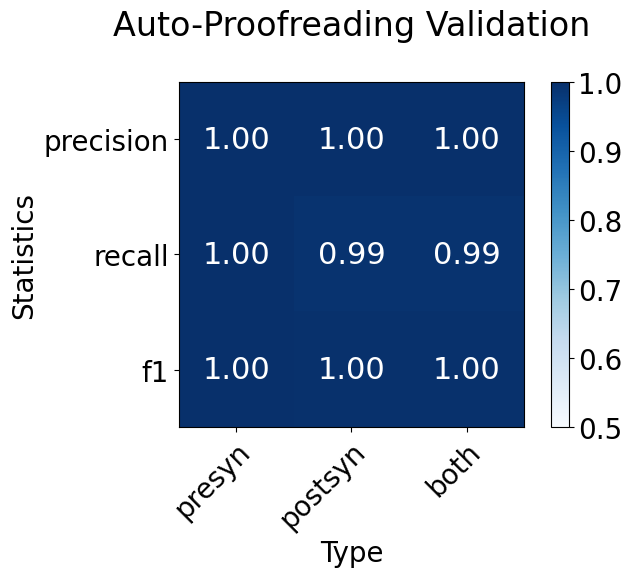

In [14]:
curr_idx = 23
segment_id = segment_ids[curr_idx]
print(f"Segment_id = {segment_id}")
curr_validation_df = validation_dfs[curr_idx]
vu.synapse_validation_df_to_score_plot(curr_validation_df)

# Picking the neuron to visualize

In [17]:
du.plot_proofread_validation_neuron(
    segment_id = segment_id,
    validation_df=curr_validation_df,
    verbose = True,
    synapse_type = "presyn",
)

Working on Neuron: 864691136545546146


Synapse Category Results, synapse_type = presyn
# of TP = 19
# of TN = 1
# of FP = 0
# of FN = 0
No axon skeleton attribute stored in database table


TP:yellow
TN:aqua
FP:black
FN:orange


# Checking the neuron proofreading

In [18]:
segment_id = vu.validation_df_to_old_segment_id(curr_validation_df)
segment_id

864691136545546146

In [19]:
neuron_objs,neuron_split_idxs = du.decomposition_with_spine_recalculation(segment_id)

Decompressing Neuron in minimal output mode...please wait
Pulled from Table Decomposition so setting split_index = 0
Dont need spine recalculation
Number of Neurons found = 1


In [20]:
neuron_obj = neuron_objs[0]
neuron_obj.segment_id

864691136545546146

In [21]:
clu.axon_classification(neuron_obj,
                       plot_axons=True)


Part 1: Axon like branchese 
{'L0': array([5]), 'L4': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])}
Limb L0 soma angle: 11.3 
Limb L1 soma angle: 98.86 
Limb L2 soma angle: 88.93 
Limb L3 soma angle: 140.78 
Limb L4 soma angle: 145.22 
Limb L5 soma angle: 106.24 

Part 2: possible_axon_limbs = [1, 2, 3, 4, 5]

Phase 2: Working on Limb L1
nodes_to_eliminate = []

Phase 2: Working on Limb L2
nodes_to_eliminate = [8]

Phase 2: Working on Limb L3
nodes_to_eliminate = [5 9]

Phase 2: Working on Limb L4
nodes_to_eliminate = []

Phase 2: Working on Limb L5
nodes_to_eliminate = []

----Working on Limb L1-----
No nodes were eliminated so don't need to add back any candidates

----Working on Limb L2-----
No endpoints were eliminated so don't need to add back any candidates

----Working on Limb L3-----
No endpoints were eliminated so don't need to add back any candidates

----Working on Limb L4-----
No nodes were eliminated so don't need to add back any candidates


base_final_widths = [ 71.2684394  176.65866322 201.47105814]
overall_ais_width = 163.96293997712442
ais_width = 149.79938691820925
Adding the following branches as true axons: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.]
curr_soma_angle = 145.22
max_axon_angle = 163.4172722030586
Changing to a better axon candidate


 --- Working on limb 5, candidate # 0
0 out of 1 branches are axons
Axon percentage = 0.0
Not adding candidate no axon branches detected 
Using the best axon approach
Using True
Limb L4: Axon branches before dendritic path filter = [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.]
Limb L4: Axon branches AFTER dendritic path filter = [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.]


Part 4: final_true_axons = {'L4': array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16.])}

 Working on visualization type: mesh


({'L4': array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
         13., 14., 15., 16.])},
 {'L0': array([5])})

In [23]:
nviz.plot_axon(neuron_obj,skeleton = True)


 Working on visualization type: mesh

 Working on visualization type: skeleton


# Just want to label thin vs. thick axon

In [24]:
# Getting the high fidelity axon
neuron_obj_high_fid_axon = pru.refine_axon_for_high_fidelity_skeleton(neuron_obj)

Starting axon branch was the starting node so using border vertices and NOT computing upstream branch
upstream_node_to_axon_starting_branch = None


  0%|          | 0/1 [00:00<?, ?it/s]

root_curr = [1272394.   632033.6  980102.4]
Time for preparing soma vertices and root: 0.0009136199951171875
invalidation_d = 2000
cc_vertex_thresh = 10


  0%|          | 0/40101 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.94it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.9966645240783691
branches_touching_root = [5]
combining close nodes
combine_threshold = 1300
length of Graph = 8917
After combining close endpoints max(kept_branches_idx) = 30, len(kept_branches_idx) = 31
empty_indices % = 0.0
 conflict_indices % = 0.009127674759287316


  0%|          | 0/15 [00:00<?, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/31 [00:00<?, ?it/s]

Decomposing first pass: 6.316967725753784
Only Using MeshParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 5.2928924560546875e-05
Total time for MAP sublimb processing 9.298324584960938e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 9.34600830078125e-05
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.08289694786071777
sbv[0].reshape(-1,3) = [[1272394.   632033.6  980102.4]]
closest_sk_pt_coord BEFORE = [1272753.70534828  632356.19846315  980489.44992463]
current_skeleton.shape = (452, 2, 3)
node_for_stitch = 452: [1272753.70534828  632356.19846315  980489.44992463]
node_for_stitch AFTER = 452: [1272753.70534828  632356.19846315  980489.44992463]
possible_node_loc = [450 452]
possible_node_loc AFTER = [450 452]
curr_shortest_path = [452]
Current stitch point was a branch or endpoint
change_stat

  0%|          | 0/1 [00:00<?, ?it/s]

Removed 1 skeletal branches


  0%|          | 0/31 [00:00<?, ?it/s]

79866 79867
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/29 [00:00<?, ?it/s]

Limb Correspondence before stitching = 29
Limb Correspondence AFTER stitching = 29
Upstream node was None so don't have to adjust
concept_network_dict = {0: [<networkx_utils.GraphOrderedEdges object at 0x7fe9fa1026a0>]}


----Working on seperate_graph 0----


---------Working on soma_idx = 0, soma_group_idx 0, endpt = [1272753.70534828  632356.19846315  980489.44992463]---------
Starting_edge inside branches_to_conept = [[1272741.7341808   674594.74403301  982583.25549652]
 [1272753.70534828  632356.19846315  980489.44992463]]
At the start, starting_node (in terms of the skeleton, that shouldn't match the starting edge) = [20]
printing out current edge:
[[1272753.70534828  632356.19846315  980489.44992463]
 [1272741.7341808   674594.74403301  982583.25549652]]
edge_endpoints_to_process was empty so exiting loop after 29 iterations
starting_node in concept map (that should match the starting edge) = 18
Total time for branches to concept conversion = 0.599468469619751

Done generating co

In [25]:
neuron_obj_high_fid_axon.axon_limb_branch_dict

{'L4': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])}

In [26]:
import neuron_searching as ns

In [27]:
large_width_limb_branch = ns.query_neuron(neuron_obj_high_fid_axon,
                functions_list=["median_mesh_center","axon_label"],
               query = "(median_mesh_center > 90) and (axon_label == True)",
                
               function_kwargs=dict(limbs_to_process=["L1"],
                                   ))
large_width_limb_branch

nviz.plot_limb_branch_dict(neuron_obj_high_fid_axon,
                          large_width_limb_branch,
                          visualize_type=["mesh","skeleton"])


 Working on visualization type: mesh

 Working on visualization type: skeleton


# Run bouton finding on all of the axon below a ertain width

In [34]:
max_bouton_width_to_check = 120

In [35]:
large_width_limb_branch = ns.query_neuron(neuron_obj_high_fid_axon,
                functions_list=["median_mesh_center","axon_label"],
               query = f"(median_mesh_center > {max_bouton_width_to_check}) and (axon_label == True)",
                
               function_kwargs=dict(limbs_to_process=[ax_limb_name],
                                   ))
print(f"large_width_limb_branch = {large_width_limb_branch}")

nviz.plot_limb_branch_dict(neuron_obj_high_fid_axon,
                          large_width_limb_branch,
                          visualize_type=["mesh","skeleton"])

large_width_limb_branch = {'L4': array([ 1,  6,  8, 11, 18, 19, 20, 21])}

 Working on visualization type: mesh

 Working on visualization type: skeleton


In [224]:
ax_limb_name = neuron_obj_high_fid_axon.axon_limb_name
axon_check_for_boutons = ns.query_neuron(neuron_obj_high_fid_axon,
                functions_list=["median_mesh_center","axon_label"],
               query = f"(median_mesh_center < {max_bouton_width_to_check}) and (axon_label == True)",
                
               function_kwargs=dict(limbs_to_process=[ax_limb_name],
                                   ))
print(f"axon_check_for_boutons = {axon_check_for_boutons}")

nviz.plot_limb_branch_dict(neuron_obj_high_fid_axon,
                          axon_check_for_boutons,
                          visualize_type=["mesh","skeleton"])

axon_check_for_boutons = {'L4': array([ 0,  2,  3,  4,  5,  7,  9, 10, 12, 13, 14, 15, 16, 17, 22, 23, 24,
       25, 26, 27, 28])}

 Working on visualization type: mesh

 Working on visualization type: skeleton


In [232]:
import width_utils as wu
import trimesh_utils as tu


"""
Psuedocode: Iterate through all of the branch objects and 
compute the bouton meshes and store as boutons


"""
from tqdm_utils import tqdm

width_name = "no_bouton_median"
verbose = False

#neuron_obj_high_fid_axon = neuron.Neuron(neuron_obj_high_fid_axon)

for l_idx,branch_list in axon_check_for_boutons.items():
    for b in tqdm(branch_list):
        branch_obj = neuron_obj_high_fid_axon[l_idx][b]
        b_meshes= tu.bouton_meshes(branch_obj,
                                            return_non_boutons=False,
                                                 return_cdf_widths=False)
        

        branch_obj.boutons = list(b_meshes)
        
        
        # ----- Doing the new width calculation -------- #
        
        skeleton_segment_size=1000
        width_segment_size = None
        distance_by_mesh_center = True
        no_spines = False
        summary_measure = "median"

        if len(b_meshes) > 0:
            if verbose:
                print(f"Calculating new width because had {branch_obj.n_boutons} boutons")
            current_width_array,current_width = wu.calculate_new_width(branch_obj, 
                          skeleton_segment_size=skeleton_segment_size,
                          width_segment_size=width_segment_size, 
                          distance_by_mesh_center=distance_by_mesh_center,
                          no_spines=no_spines,
                          summary_measure=summary_measure,
                          return_average=True,
                          print_flag=False,
                        no_boutons=True,
                            old_width_calculation=branch_obj.width_new["no_spine_median_mesh_center"])
                                  
        else:
            current_width = branch_obj.width_new["no_spine_median_mesh_center"]
            current_width_array = branch_obj.width_array["no_spine_median_mesh_center"] 
        #calculating the mean/width width of boutons and non_boutons
        
        branch_obj.width_new[width_name]  = current_width
        branch_obj.width_array[width_name] = current_width_array


Recieved another instance of Neuron class in init -- so just copying data


  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/46 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

In [90]:
branch_obj = neuron_obj_high_fid_axon[neuron_obj_high_fid_axon.axon_limb_name][15]
nviz.plot_branches_with_boutons(branch_obj,
                               plot_skeletons=False)

No boutons to plot
width = {'median_mesh_center': 50.46740832192515, 'no_spine_median_mesh_center': 50.46740832192515, 'bouton_median': 50.46740832192515}, 
n_boutons = 0,
skeleton_length (in microns) = 20.918272057580122
area = 10.698956407397715


In [110]:
new_meshes, cgal_info = tu.mesh_segmentation(branch_obj.mesh,
                    clusters=5,
                    smoothness=0.1)
new_meshes, cgal_info

  0%|          | 0/14 [00:00<?, ?it/s]

([<trimesh.Trimesh(vertices.shape=(114, 3), faces.shape=(220, 3))>,
  <trimesh.Trimesh(vertices.shape=(108, 3), faces.shape=(206, 3))>,
  <trimesh.Trimesh(vertices.shape=(82, 3), faces.shape=(157, 3))>,
  <trimesh.Trimesh(vertices.shape=(45, 3), faces.shape=(84, 3))>,
  <trimesh.Trimesh(vertices.shape=(39, 3), faces.shape=(72, 3))>,
  <trimesh.Trimesh(vertices.shape=(51, 3), faces.shape=(65, 3))>,
  <trimesh.Trimesh(vertices.shape=(33, 3), faces.shape=(60, 3))>,
  <trimesh.Trimesh(vertices.shape=(30, 3), faces.shape=(53, 3))>,
  <trimesh.Trimesh(vertices.shape=(26, 3), faces.shape=(46, 3))>,
  <trimesh.Trimesh(vertices.shape=(25, 3), faces.shape=(43, 3))>,
  <trimesh.Trimesh(vertices.shape=(19, 3), faces.shape=(32, 3))>,
  <trimesh.Trimesh(vertices.shape=(14, 3), faces.shape=(22, 3))>,
  <trimesh.Trimesh(vertices.shape=(13, 3), faces.shape=(17, 3))>,
  <trimesh.Trimesh(vertices.shape=(11, 3), faces.shape=(16, 3))>],
 array([0.1274785 , 0.1332005 , 0.0773645 , 0.172135  , 0.0764593 ,
  

In [124]:
nviz.plot_objects(branch_obj.mesh,
                  meshes=[new_meshes[12]],
                 meshes_colors="red")

In [131]:
branch_obj = neuron_obj_high_fid_axon[neuron_obj_high_fid_axon.axon_limb_name][22]
b_meshes= tu.bouton_meshes(branch_obj,
                           clusters=5,
                           smoothness = 0.1,
                                            return_non_boutons=False,
                                                 return_cdf_widths=False,
                           min_size_threshold=27,
                           cdf_threshold = 0.20,
                           ray_trace_threshold=200,
                           plot_segmentation=True,
                           plot_boutons=True,
                          verbose=True)

  0%|          | 0/10 [00:00<?, ?it/s]

Segmentation Info:
Mesh 0: <trimesh.Trimesh(vertices.shape=(150, 3), faces.shape=(248, 3))> (0.51414)
Mesh 1: <trimesh.Trimesh(vertices.shape=(105, 3), faces.shape=(203, 3))> (0.120292)
Mesh 2: <trimesh.Trimesh(vertices.shape=(47, 3), faces.shape=(81, 3))> (0.194492)
Mesh 3: <trimesh.Trimesh(vertices.shape=(36, 3), faces.shape=(57, 3))> (0.330561)
Mesh 4: <trimesh.Trimesh(vertices.shape=(28, 3), faces.shape=(39, 3))> (0.353399)
Mesh 5: <trimesh.Trimesh(vertices.shape=(7, 3), faces.shape=(9, 3))> (0.0335454)
Mesh 6: <trimesh.Trimesh(vertices.shape=(7, 3), faces.shape=(6, 3))> (0.4453465)
Mesh 7: <trimesh.Trimesh(vertices.shape=(15, 3), faces.shape=(5, 3))> (0.0)
Mesh 8: <trimesh.Trimesh(vertices.shape=(4, 3), faces.shape=(2, 3))> (0.425363)
Mesh 9: <trimesh.Trimesh(vertices.shape=(3, 3), faces.shape=(1, 3))> (0.0730909)



 After CDF Trheshold:
# of bouton meshes = 5:
boutons_idx = [0 3 4 6 8]
bouton_meshes = [<trimesh.Trimesh(vertices.shape=(150, 3), faces.shape=(248, 3))>
 <trimesh.Trimesh(vertices.shape=(36, 3), faces.shape=(57, 3))>
 <trimesh.Trimesh(vertices.shape=(28, 3), faces.shape=(39, 3))>
 <trimesh.Trimesh(vertices.shape=(7, 3), faces.shape=(6, 3))>
 <trimesh.Trimesh(vertices.shape=(4, 3), faces.shape=(2, 3))>]
bouton_meshes_cdf = [0.51414   0.330561  0.353399  0.4453465 0.425363 ]

Using endpoint_radius with radius 1000 method for filter_away_end_meshes

Using endpoint_radius with radius 1000 method for filter_away_end_meshes
end_meshes_idx = [1, 2, 4, 5, 6, 8, 0, 1, 3, 9]

--After Filtering End Meshes--
# of bouton meshes = 0:
bouton_meshes = []
bouton_meshes_cdf = []
Applying size threshold of 27< faces <= 350
boutons_idx = []

--After Filtering for size --
# of bouton meshes = 0:
bouton_meshes = []
bouton_meshes_cdf = []
original_bouton_idx = []

--Applying ray trace threshold = 200--
mes


 Working on visualization type: mesh

 Working on visualization type: skeleton


No limb name was given so using L4 because was the limb in the first key


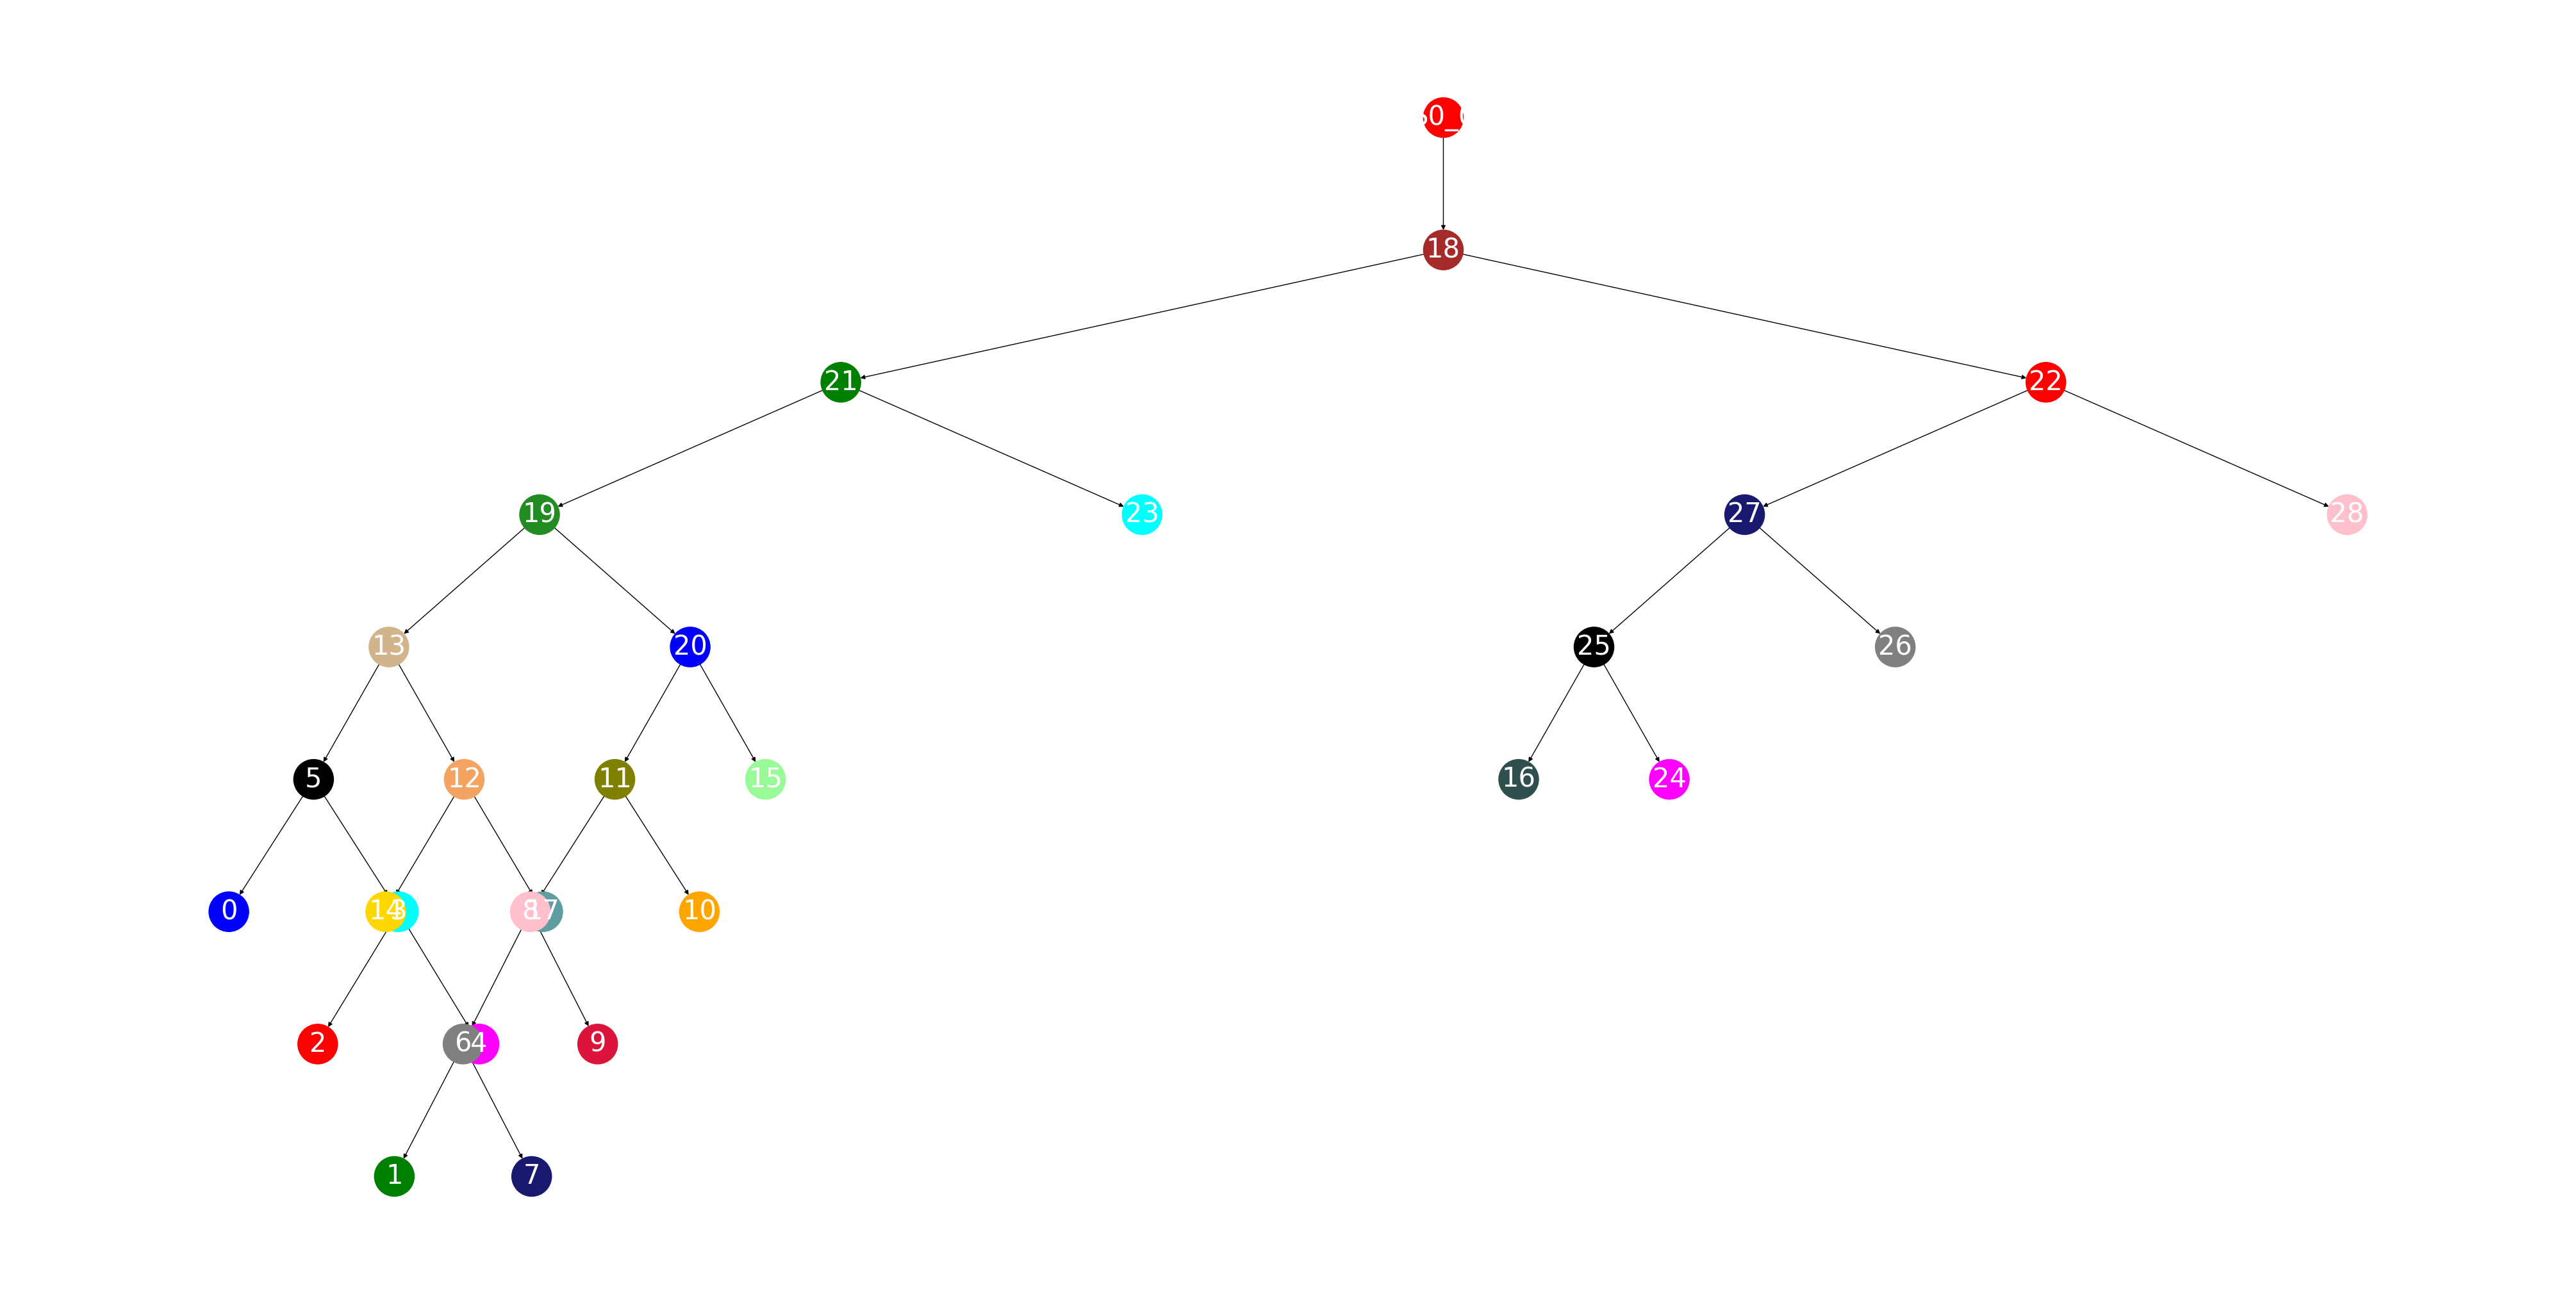

In [89]:
nviz.visualize_neuron_specific_limb(neuron_obj_high_fid_axon,
                                   neuron_obj_high_fid_axon.axon_limb_name)

In [138]:
[k for k in dir(nru) if "feature" in k]

['feature_over_limb_branch_dict', 'sum_feature_over_limb_branch_dict']

In [137]:
dir(nru)

['KDTree',
 'Path',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'add_branch_label',
 'align_and_restrict_branch',
 'all_concept_network_data_to_dict',
 'all_concept_network_data_to_limb_network_stating_info',
 'all_medain_mesh_center_widths',
 'all_no_spine_median_mesh_center_widths',
 'all_skeletal_lengths',
 'all_soma_connnecting_endpionts_from_starting_info',
 'all_starting_attr_by_limb_and_soma',
 'all_starting_dicts_by_soma',
 'apply_adaptive_mesh_correspondence_to_neuron',
 'axon_area',
 'axon_length',
 'axon_mesh',
 'axon_only_group',
 'axon_skeleton',
 'branch_boundary_transition',
 'branch_boundary_transition_old',
 'branch_mesh_no_boutons',
 'branch_mesh_no_spines',
 'branch_skeletal_distance_from_soma',
 'branches_at_high_degree_coordinates',
 'branches_on_limb_after_edges_deleted_and_created',
 'branches_to_concept_network',
 'branches_within_skeletal_distance',
 'check_concept_network',
 'check_points_i

In [135]:
nviz.plot_boutons(neuron_obj_high_fid_axon,
                  mesh_whole_neuron_alpha=0.2,
                 )


 Working on visualization type: mesh

 Working on visualization type: skeleton


In [140]:
from importlib import reload
import neuron 

neuron = reload(neuron)

In [141]:
neuron_obj_2 = neuron.Neuron(neuron_obj_high_fid_axon)

Recieved another instance of Neuron class in init -- so just copying data


In [142]:
nviz.plot_boutons(neuron_obj_2)


 Working on visualization type: mesh

 Working on visualization type: skeleton


In [151]:
neuron_obj_2.compute_boutons_volume()

In [153]:
neuron_obj_2.spines_volume

[226412538.12000528,
 91963919.92167154,
 106800571.95506349,
 554450659.406709,
 481275270.4785156,
 500968526.67661536,
 446376900.78326416,
 101591350.12836137,
 356313831.3534342,
 255989528.59006754,
 110827004.64172363,
 776894043.9084616,
 503275578.6416321,
 184803392.8649953,
 314087237.21998656,
 408026309.75185645,
 242114461.77500406,
 182309276.16323853,
 176559387.8984553,
 229544345.1082967,
 455141174.4899495,
 126576326.09005737,
 71901627.72001138,
 684353704.5216064,
 272585633.4301694,
 79368686.20665486,
 480029913.911499,
 208133242.64333263,
 157942736.8634081,
 426890879.2616628,
 231158099.03998438,
 139402894.06667072,
 341489762.7916056,
 141455296.2800393,
 201688463.95167032,
 153733428.90669757,
 67216240.87666829,
 213209427.79838306,
 330801722.85672,
 193194990.56833902,
 102617408.31002231,
 81069850.48164876,
 35069616.2333374,
 32484979.218343098,
 123658243.52665201,
 125676338.98332722,
 131301025.49169667,
 30478332.783334095,
 124049704.2483317,


# checking individual boutons (for other additional filters)

In [170]:
ax_name = neuron_obj_2.axon_limb_name
prospective_branches = neuron_obj_2.axon_limb_branch_dict[ax_name]
b_with_boutons = [k for k in prospective_branches if neuron_obj_2[ax_name][k].n_boutons > 0]
b_with_boutons

[0, 2, 3, 5, 7, 12, 13, 14, 15, 16, 17, 27, 28]

In [209]:
volume_ratios = np.array([tu.mesh_volume_ratio(k) for k in bouton_meshes])
volume_errors = np.where(volume_ratios<2)[0]

In [206]:
volume_ratios

array([2.35728986, 2.36371472, 2.21300833, 2.07958173, 2.17048076,
       2.43799677, 2.48403837, 2.17711226, 2.55793881, 2.20340208,
       1.96083665, 2.13110101, 2.43495484, 2.38338862, 2.1841239 ,
       2.30721285, 2.26343746, 2.4920921 , 2.45302623, 2.22754426,
       2.56358124, 2.30413927, 2.14852485, 2.70164685, 2.09596081,
       1.94378026, 1.91964738, 2.02703968, 2.37487656, 2.06207596,
       2.59947089, 2.2714665 , 2.05568381, 2.13194046, 2.13570053,
       2.39512235, 2.16790986, 2.40437386, 2.46310181, 2.70096524,
       2.50821134, 2.09300565, 1.91457095, 2.04208003, 2.36738297,
       2.04494159, 2.19691263, 2.19078116, 1.85380693])

In [197]:
bouton_meshes = np.array(neuron_obj_2[ax_name].boutons)
bouton_side_length_rat = np.max([tu.side_length_ratios(k) for k in bouton_meshes],axis=1)
high_ratios = np.where(bouton_side_length_rat>2.5)[0]

In [212]:
volume_errors

array([10, 25, 26, 42, 48])

In [211]:
nviz.plot_objects(neuron_obj_2.axon_mesh,
                  
                meshes=bouton_meshes[volume_errors],
                 meshes_colors='red')

In [217]:
nviz.plot_boutons(neuron_obj_2)


 Working on visualization type: mesh

 Working on visualization type: skeleton


In [192]:
nviz.plot_objects(branch_obj.mesh,
                 meshes=[branch_obj.boutons[6]],
                 meshes_colors="red")

In [178]:
curr_idx = 3
curr_branch_idx =b_with_boutons[curr_idx]
print(f"branch_idx = {curr_branch_idx}")
branch_obj = neuron_obj_2[ax_name][curr_branch_idx]
nviz.plot_branches_with_boutons(branch_obj,
                               plot_skeletons=False)

branch_idx = 5
width = {'median_mesh_center': 56.032099550785254, 'no_spine_median_mesh_center': 56.032099550785254, 'bouton_median': 53.658098350707995}, 
n_boutons = 8,
skeleton_length (in microns) = 70.14340509038581
area = 44.18171294980903


In [ ]:
curr_idx = 0
nviz.plot_objects(neuron_obj_2.axon_mesh,
    meshes=[neuron_obj_2.boutons[curr_idx]],
                 meshes_colors="red",)

In [159]:
curr_idx = 0
nviz.plot_objects(neuron_obj_2.axon_mesh,
    meshes=[neuron_obj_2.boutons[curr_idx]],
                 meshes_colors="red",)

# Come up with way to find the webbing

In [221]:
import networkx_utils as xu

In [253]:
# find all the nodes that branch off into 2 nodes

"""
Pseudocode: Find all of the nodes that branch off into 2 other nodes
so that can try and isolate webbing in between if thin enough

Pseudocode: 
Iterate through all nodes of the axon
1) Find the number of downstream nodes
"""

n_obj = neuron_obj_high_fid_axon

n_downstream_targets_threshold = 2
width_threshold = 90
width_name = "no_bouton_median"

verbose = True

ax_limb_name = n_obj.axon_limb_name
ax_limb_idx = int(ax_limb_name[1:])
ax_branches = n_obj.axon_limb_branch_dict[ax_limb_name]

ax_limb = n_obj[ax_limb_name]

curr_nx = ax_limb.concept_network_directional

viable_nodes = []
downstream_nodes = []
for a in ax_branches:
    b_obj = ax_limb[a]
    curr_downstream_nodes = xu.downstream_nodes(curr_nx,a)
    if (len(curr_downstream_nodes) == n_downstream_targets and
        (width_name in ax_limb[a].width_new.keys()) and
        ax_limb[a].width_new[width_name] < width_threshold):
        viable_nodes.append(a)
        downstream_nodes.append(curr_downstream_nodes)

if verbose:
    print(f"viable_nodes = {viable_nodes}")
    print(f"downstream_nodes = {downstream_nodes}")
    
nviz.visualize_neuron_path(n_obj,ax_limb_idx,path=viable_nodes,
                          visualize_type=["mesh"])

viable_nodes = [3, 5, 12, 13, 22, 25, 27]
downstream_nodes = [array([2, 4]), array([0, 3]), array([14, 17]), array([ 5, 12]), array([27, 28]), array([16, 24]), array([25, 26])]

 Working on visualization type: mesh


In [309]:
d_nodes_obj

[<neuron.Branch at 0x7fe9c91d6eb8>, <neuron.Branch at 0x7fe9c91e0240>]

In [311]:
nviz.plot_branches_with_boutons(d_nodes_obj[1])

width = {'median_mesh_center': 57.480040517277324, 'no_spine_median_mesh_center': 57.480040517277324, 'bouton_median': 55.97265809539341, 'no_bouton_median': 55.97265809539341}, 
n_boutons = 1,
skeleton_length (in microns) = 8.79616173214034
area = 4.347478323587673


In [316]:
nviz.plot_branches_with_boutons(d_nodes_obj[0])

width = {'median_mesh_center': 56.872334850786416, 'no_spine_median_mesh_center': 56.872334850786416, 'bouton_median': 47.529637225858295, 'no_bouton_median': 47.529637225858295}, 
n_boutons = 24,
skeleton_length (in microns) = 137.34573215342127
area = 82.52218588000041


In [312]:
nviz.plot_branches_with_boutons(v_obj)

width = {'median_mesh_center': 57.480040517277324, 'no_spine_median_mesh_center': 57.480040517277324, 'bouton_median': 55.97265809539341, 'no_bouton_median': 55.97265809539341}, 
n_boutons = 1,
skeleton_length (in microns) = 8.79616173214034
area = 4.347478323587673


In [313]:
v

5

In [314]:
d_nodes

array([0, 3])

In [369]:
curr_n_idx = 6
v = viable_nodes[curr_n_idx]
v_obj = ax_limb[v]

if verbose:
    print(f"Current Node = {v} with width {ax_limb[v].width_new['no_bouton_median']}")


d_nodes = downstream_nodes[curr_n_idx]
d_nodes_obj = [ax_limb[d] for d in d_nodes]

v_mesh_with_boutons = v_obj.mesh
d_meshes_with_boutons = [k.mesh for k in d_nodes_obj]


nviz.plot_objects(meshes=[v_mesh_with_boutons] + d_meshes_with_boutons,
                 meshes_colors=["red","aqua","black"],
                 mesh_alpha=1)


v_mesh_without_boutons = nru.mesh_without_boutons(v_obj)
d_meshes_without_boutons = [nru.mesh_without_boutons(d_obj) for d_obj in d_nodes_obj]
intersection_mesh = tu.combine_meshes([v_mesh_without_boutons] + d_meshes_without_boutons)

nviz.plot_objects(meshes=[v_mesh_without_boutons] + d_meshes_without_boutons,
                 meshes_colors=["red","aqua","black"],
                 mesh_alpha=1)

Current Node = 27 with width 64.22077544310893


In [370]:
# finding the point of intersection for their skeletons
import skeleton_utils 
all_intersecting_skeletons = [d.skeleton for d in d_nodes_obj] + [v_obj.skeleton]
joining_endpoint_1 = sk.shared_coordiantes(all_intersecting_skeletons,
                     return_one=True)

coordinates_of_intersection = [sk.skeleton_coordinate_offset_from_endpoint(k,joining_endpoint_1,500) for k in all_intersecting_skeletons]


if verbose:
    print(f"joining_endpoint_1 = {joining_endpoint_1}")
    print(f"coordinates_of_intersection = {coordinates_of_intersection}")

joining_endpoint_1 = [1279712.35354271  669030.25418228  993566.51159415]
coordinates_of_intersection = [array([1279675.64442825,  668989.13411599,  994122.86849841]), array([1279692.08025977,  668587.40144323,  993337.20194052]), array([1279722.05857917,  669329.04164685,  993165.99352115])]


In [371]:
potential_webbing_mesh = tu.closest_split_to_coordinate(intersection_mesh,
                              coordinate = coordinates_of_intersection,
                              plot_split=False,
                              plot_closest_mesh=True,
                              significance_threshold = 20,
                              verbose = True)

Winning Mesh idx = 0, mesh = <trimesh.Trimesh(vertices.shape=(369, 3), faces.shape=(710, 3))>


In [372]:
web_mesh,web_cdf = tu.closest_segmentation_to_coordinate(potential_webbing_mesh,
                                  coordinates_of_intersection,
                                smoothness = 0.08,
                                clusters=5,
                                  plot_segmentation=True,
                                  plot_closest_mesh=True,
                                     return_cgal=True)
print(f"web_mesh = {web_mesh}, web_cdf = {web_cdf}")

  0%|          | 0/12 [00:00<?, ?it/s]

Segmentation Info:
Mesh 0: <trimesh.Trimesh(vertices.shape=(97, 3), faces.shape=(166, 3))> (0.652782)
Mesh 1: <trimesh.Trimesh(vertices.shape=(71, 3), faces.shape=(135, 3))> (0.246117)
Mesh 2: <trimesh.Trimesh(vertices.shape=(67, 3), faces.shape=(128, 3))> (0.130484)
Mesh 3: <trimesh.Trimesh(vertices.shape=(50, 3), faces.shape=(94, 3))> (0.09953429999999999)
Mesh 4: <trimesh.Trimesh(vertices.shape=(34, 3), faces.shape=(60, 3))> (0.6005335)
Mesh 5: <trimesh.Trimesh(vertices.shape=(28, 3), faces.shape=(49, 3))> (0.330091)
Mesh 6: <trimesh.Trimesh(vertices.shape=(17, 3), faces.shape=(28, 3))> (0.103911)
Mesh 7: <trimesh.Trimesh(vertices.shape=(14, 3), faces.shape=(22, 3))> (0.121444)
Mesh 8: <trimesh.Trimesh(vertices.shape=(9, 3), faces.shape=(12, 3))> (0.283903)
Mesh 9: <trimesh.Trimesh(vertices.shape=(9, 3), faces.shape=(12, 3))> (0.282559)
Mesh 10: <trimesh.Trimesh(vertices.shape=(4, 3), faces.shape=(3, 3))> (0.040125)
Mesh 11: <trimesh.Trimesh(vertices.shape=(3, 3), faces.shape=(1, 3)

web_mesh = <trimesh.Trimesh(vertices.shape=(34, 3), faces.shape=(60, 3))>, web_cdf = 0.6005335


In [ ]:
[k for k in dir(pu) if "width" in k]

In [ ]:
exc_double_back_and_width_change_filter = pru.make_filter_dict("double_back_and_width_change",
                                                         pru.filter_away_large_double_back_or_width_changes,
                                                          dict(perform_double_back_errors=True,
                                                              skip_double_back_errors_for_axon=False,
                                                              #double_back_threshold = 140,
                                                               
                                                               width_jump_threshold = 50,
                                                               running_width_jump_method=True, 
                                                               
                                                               
                                                               double_back_axon_like_threshold=145,
                                                               #double_back_threshold = 115,
                                                               double_back_threshold = 120,
                                                               width_name = "bouton_median"
                                                              ),catch_error=False,
                                                               
                                                               
                                                         )

bouton_double_back_filter = [exc_double_back_and_width_change_filter]

In [ ]:
plot_limb_branch_filter_with_disconnect_effect = True
verbose= True
verbose_outline= True


o_neuron_pre, filtering_info_pre = pru.apply_proofreading_filters_to_neuron(input_neuron = neuron_obj_high_fid_axon,
                                        filter_list = bouton_double_back_filter,
                    plot_limb_branch_filter_with_disconnect_effect=plot_limb_branch_filter_with_disconnect_effect,
                                        plot_limb_branch_filter_away=False,
                                        plot_final_neuron=False,

                                        return_error_info=True,
                                         verbose=verbose,
                                        verbose_outline=verbose_outline)

In [ ]:
o_neuron_pre

In [128]:
[k for k in dir(tu) if "coordinate" in k]

['check_coordinates_inside_bounding_box',
 'closest_face_to_coordinate',
 'closest_mesh_to_coordinate',
 'filter_meshes_by_containing_coordinates',
 'find_closest_face_to_coordinates',
 'largest_border_to_coordinate',
 'vertices_coordinates_to_faces',
 'vertices_coordinates_to_faces_old',
 'vertices_coordinates_to_vertex_index']

In [ ]:
minnie.AutoProofreadNeurons3() & "spine_category = 'densely_spined'"

In [ ]:
minnie.AutoProofreadNeurons3() & "cell_type_predicted = 'inhibitory'"

In [ ]:
nviz.plot_objects(meshes=new_branch_mesh,
                 meshes_colors="random")

In [ ]:
non_b_meshes_too_small_colors = mu.generate_unique_random_color_list(len(non_b_meshes_too_small),
                                    colors_to_omit=["black","red"])

color_list = [bouton_color]*len(b_meshes) + [non_bouton_color]*len(non_b_meshes) + non_b_meshes_too_small_colors
meshes_list = list(b_meshes) + list(non_b_meshes) + list(non_b_meshes_too_small)

nviz.plot_objects(main_mesh = branch_obj.mesh,
                      main_mesh_alpha=1,
                     main_mesh_color=main_mesh_color,
                     meshes=meshes_list,
                     meshes_colors=color_list,
                     mesh_alpha=1)

In [ ]:
branch_obj = neuron_obj_high_fid_axon[l_idx][1]

bouton_color = "red"
non_bouton_color = "black"
main_mesh_color = "green"

if hasattr(branch_obj,"boutons"):
    b_meshes = branch_obj.boutons
    non_b_meshes = branch_obj.non_boutons
    
    width_types = ["bouton_mean",
                  "bouton_median",
                  "non_bouton_mean",
                  "non_bouton_median"]
    for w_t in width_types:
        print(f"{w_t}:{branch_obj.width_new[w_t]}")
    
    color_list = [bouton_color]*len(b_meshes) + [non_bouton_color]*len(non_b_meshes)
    meshes_list = b_meshes + non_b_meshes
    
    nviz.plot_objects(main_mesh = branch_obj.mesh,
                      main_mesh_alpha=1,
                     main_mesh_color=main_mesh_color,
                     meshes=meshes_list,
                     meshes_colors=color_list,
                     mesh_alpha=1)
else:
    print(f"No boutons analysis")

In [ ]:
print("hi")